Imports

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
import scipy.io
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load Data

In [2]:
label_data_folder = "/content/drive/MyDrive/Single channels data/Marked spike vectors"
raw_data_folder = "/content/drive/MyDrive/Single channels data/28102021_03_01_nbasal_0001/data"

In [3]:
os.chdir(label_data_folder)
mat_files = glob.glob("*.mat")

data_dict = {}

for file in mat_files[:20]:
    # Load the .mat file using scipy.io.loadmat
    mat = scipy.io.loadmat(file)
    data_dict[file[:3]] = np.concatenate(mat['Spike_Labels'])

print(data_dict.keys())
label_df = pd.DataFrame.from_dict(data_dict, orient='columns')
label_df

dict_keys(['B01', 'B03', 'A06', 'B02', 'B05', 'C06', 'C03', 'C02', 'C05', 'C04', 'A02', 'A05', 'B07', 'C01', 'A03', 'D01', 'B06', 'C07', 'D03', 'D02'])


,B01,B03,A06,B02,B05,C06,C03,C02,C05,C04,A02,A05,B07,C01,A03,D01,B06,C07,D03,D02
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
os.chdir(raw_data_folder)
mat_files = glob.glob("*.mat")

data_dict = {}

for file in mat_files[:20]:
    # Load the .mat file using scipy.io.loadmat
    mat = scipy.io.loadmat(file)
    data_dict[file[27:30]] = np.concatenate(mat['data'])

print(data_dict.keys())
raw_df = pd.DataFrame.from_dict(data_dict, orient='columns')
raw_df

dict_keys(['A02', 'A05', 'A03', 'B07', 'B06', 'B01', 'B03', 'A06', 'B02', 'B05', 'C06', 'C03', 'C02', 'C05', 'C04', 'C01', 'D01', 'C07', 'D03', 'D02'])


,A02,A05,A03,B07,B06,B01,B03,A06,B02,B05,C06,C03,C02,C05,C04,C01,D01,C07,D03,D02
0,-1.921908,-4.485947,2.472312,-1.004966,2.960513,1.983918,1.373807,-2.959032,0.274880,-0.762878,0.031140,3.020819,5.462379,-2.471503,-1.556942,0.885219,-0.762241,-1.067851,0.336652,-5.341440
1,-1.250521,-6.561143,1.007469,-3.202231,0.824282,3.326691,1.495877,0.886183,-0.030296,1.190247,0.580456,2.959784,4.119606,-2.898749,-0.641415,-1.312047,-3.569858,-0.152323,2.106672,-4.609018
2,0.397428,-4.546983,2.167137,-1.981528,-1.311948,3.814972,1.312772,0.519972,-1.861351,1.922668,1.251843,0.335272,1.617165,2.167169,-1.556942,-3.875523,-0.823276,-5.889628,-0.212664,-2.716929
3,-4.546420,-3.936631,4.242332,-4.911216,-0.884702,4.364289,-2.166232,1.557570,-1.983421,0.274719,-0.701282,-3.448907,0.457497,1.190607,2.532413,-4.852086,-8.208530,1.922872,0.214582,1.921743
4,-2.715365,-7.415635,4.181297,-2.103599,3.815005,1.068390,3.449002,-0.334520,0.702126,4.791321,-0.884388,2.532538,-1.190453,0.397150,-0.641415,1.800746,0.397427,0.458028,-0.212664,-1.130015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998995,0.153287,-1.006944,-2.532570,-0.821860,3.021548,3.143586,0.641385,-10.893602,1.983864,1.190247,-3.203724,-2.777521,-4.486351,-7.110175,2.715519,4.059047,0.397427,5.218770,-0.639910,1.799673
2998996,0.763639,-2.166612,-3.326027,5.281655,3.143618,1.922882,3.937284,-13.579149,4.547340,-2.349793,-2.410267,-3.387872,1.434059,-5.645331,0.029972,2.838344,-4.058139,5.829122,2.717023,3.020376
2998997,1.801236,-1.067979,-0.640481,0.765054,2.716372,-1.800262,-2.288302,-5.888719,-2.227562,-3.021179,-5.095814,-3.815118,-0.763207,-8.513983,-0.519344,-1.556187,-2.837436,2.716329,-5.034441,1.311392
2998998,5.097135,-9.979112,0.580223,0.398843,-0.884702,0.763215,-2.776583,2.534132,-0.701683,-2.471863,-5.645130,-0.763361,-1.068382,-9.673651,-6.867001,-3.997594,0.214322,7.171895,-1.189227,-2.533823


*   0 - no spike
*   1 - spike


In [5]:
label_df[label_df > 0] = 1
label_df

,B01,B03,A06,B02,B05,C06,C03,C02,C05,C04,A02,A05,B07,C01,A03,D01,B06,C07,D03,D02
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


example data

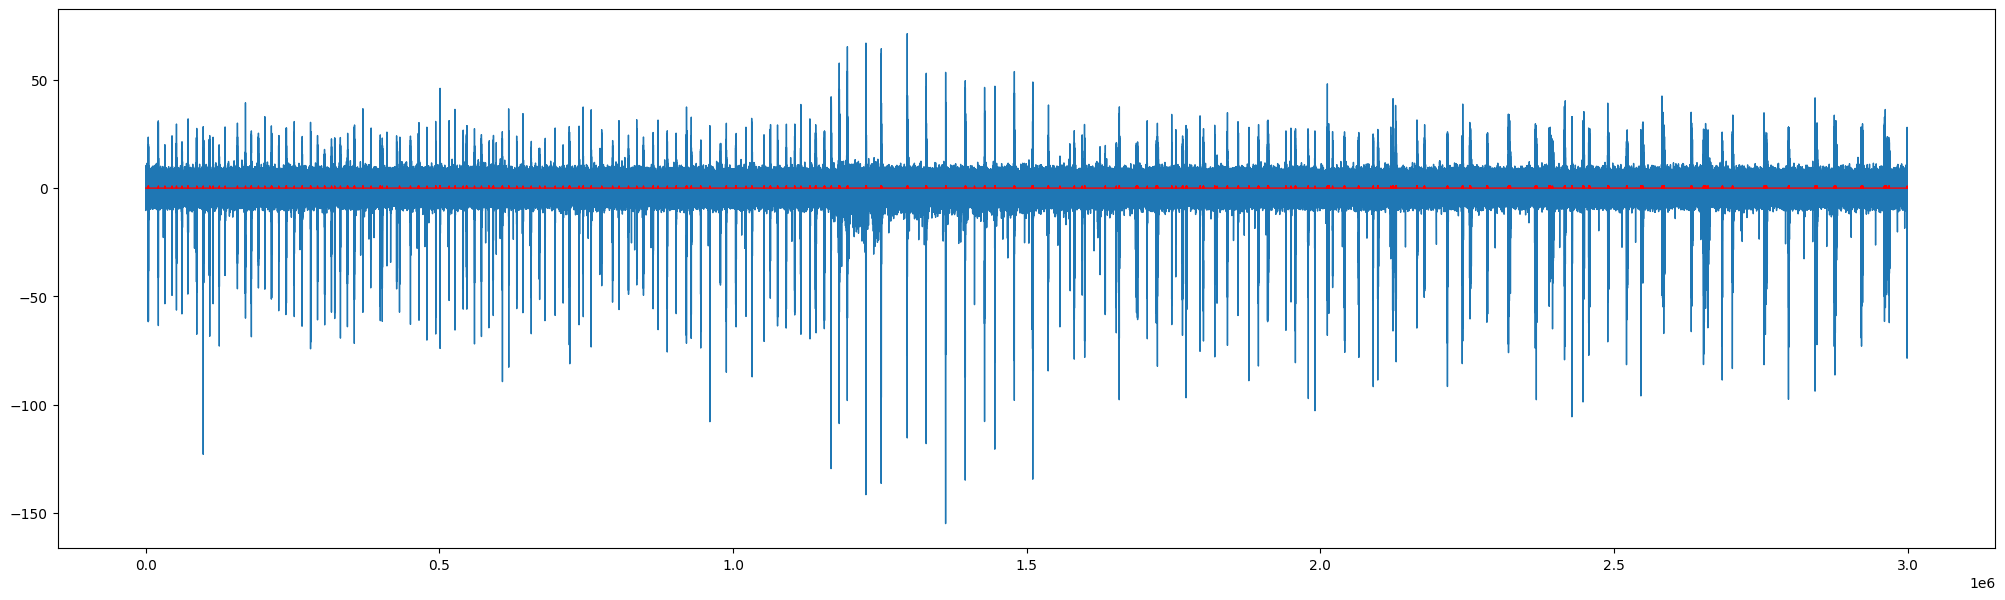

In [6]:
plt.figure(figsize=(25,7))
plt.plot(raw_df['A06'], linewidth = 1)
plt.plot(label_df['A06'], linewidth = 1, color='r')
plt.show()

# Data Pre-Processing

variables

In [7]:
neurons = ['B01', 'B03', 'A06', 'B02', 'B05', 'C06', 'C03', 'C02', 'C05', 'C04', 'A02', 'A05', 'B07', 'C01', 'A03', 'D01', 'B06', 'C07'] # neurons data

n_data_points = 3 # number of data points considered for training # V n=2, 1<t<10
t_data_points = 3 # number of FUTURE data points in which is predicted if there is a spike or no

In [8]:
label_df = label_df[neurons]
raw_df = raw_df[neurons]

label_data = label_df.values.T
raw_data = raw_df.values.T

label_data.shape, raw_data.shape

((18, 2999000), (18, 2999000))

Scaling

In [9]:
# scaler = StandardScaler()
# raw_data = scaler.fit_transform(raw_data)

Split RAW data; Input-Output

In [10]:
smaller_parts = []
samp = []

labels = []

# Split each sample into smaller parts
for sample in range(0, raw_data.shape[0]):  # Transpose the array to iterate over samples
    num_parts = raw_data[sample].shape[0] // n_data_points
    for i in range(num_parts-1):
        raw_part = raw_data[sample][i * n_data_points: (i + 1) * n_data_points]
        smaller_parts.append(raw_part)
        label = max(label_data[sample][(i + 1) * n_data_points : ((i + 1) * n_data_points + t_data_points)])
        labels.append([label])

# Convert the list of smaller parts to a NumPy array
raw_split_data = np.array(smaller_parts)
labels = np.array(labels)

raw_split_data.shape, labels.shape

((17993970, 3), (17993970, 1))

In [11]:
labels

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

# Test-Train split
wirth the same ratio of 0s and 1s in test and train data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(raw_split_data, labels, test_size=0.2, random_state=13)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14395176, 3)
X_test shape: (3598794, 3)
y_train shape: (14395176, 1)
y_test shape: (3598794, 1)


# Model

In [13]:
model = Sequential()
model.add(Dense(n_data_points, input_dim=n_data_points, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation (binary classification)

# Specify class weights
class_weights = {0: 1, 1: 200}

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Binary cross-entropy loss for binary classification

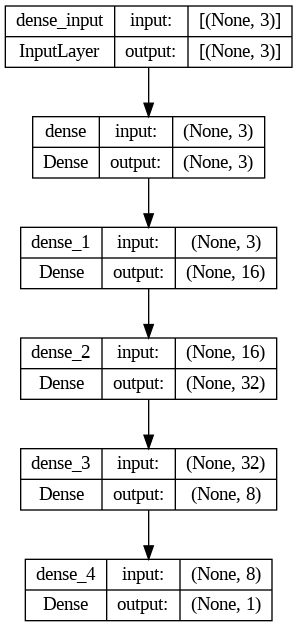

In [14]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model,
    to_file="img_model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

tf.keras.utils.plot_model(model, show_shapes=True)

In [15]:
history_model = model.fit(X_train, y_train, epochs=6, batch_size=32, class_weight=class_weights, verbose=1, validation_data=(X_test, y_test))

Epoch 1/7
449850/449850 [==============================] - 1323s 3ms/step - loss: 0.7339 - accuracy: 0.9077 - val_loss: 0.3425 - val_accuracy: 0.8975
Epoch 2/7
449850/449850 [==============================] - 1341s 3ms/step - loss: 0.7211 - accuracy: 0.9148 - val_loss: 0.2702 - val_accuracy: 0.9499
Epoch 3/7
449850/449850 [==============================] - 1393s 3ms/step - loss: 0.7212 - accuracy: 0.9166 - val_loss: 0.3312 - val_accuracy: 0.8938
Epoch 4/7
449850/449850 [==============================] - 1358s 3ms/step - loss: 0.7182 - accuracy: 0.9187 - val_loss: 0.3357 - val_accuracy: 0.9210
Epoch 5/7
449850/449850 [==============================] - 1319s 3ms/step - loss: 0.7214 - accuracy: 0.9188 - val_loss: 0.3263 - val_accuracy: 0.8966
Epoch 6/7
449850/449850 [==============================] - 1385s 3ms/step - loss: 0.7190 - accuracy: 0.9220 - val_loss: 0.2700 - val_accuracy: 0.9397
Epoch 7/7
449850/449850 [==============================] - 1303s 3ms/step - loss: 0.7211 - accuracy:

In [23]:
history_model = model.fit(X_train, y_train, epochs=1, batch_size=32, class_weight=class_weights, verbose=1, validation_data=(X_test, y_test))

449850/449850 [==============================] - 1380s 3ms/step - loss: 0.7217 - accuracy: 0.9191 - val_loss: 0.2935 - val_accuracy: 0.9059


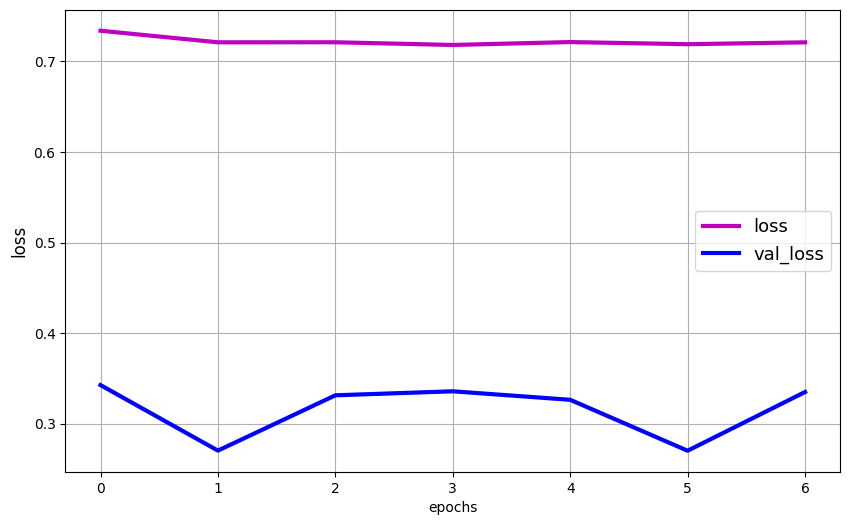

In [16]:
plt.figure(figsize=(10,6))
plt.plot(history_model.history['loss'], 'm', linewidth=3)
plt.plot(history_model.history['val_loss'], 'b', linewidth=3)
plt.legend(['loss', 'val_loss'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

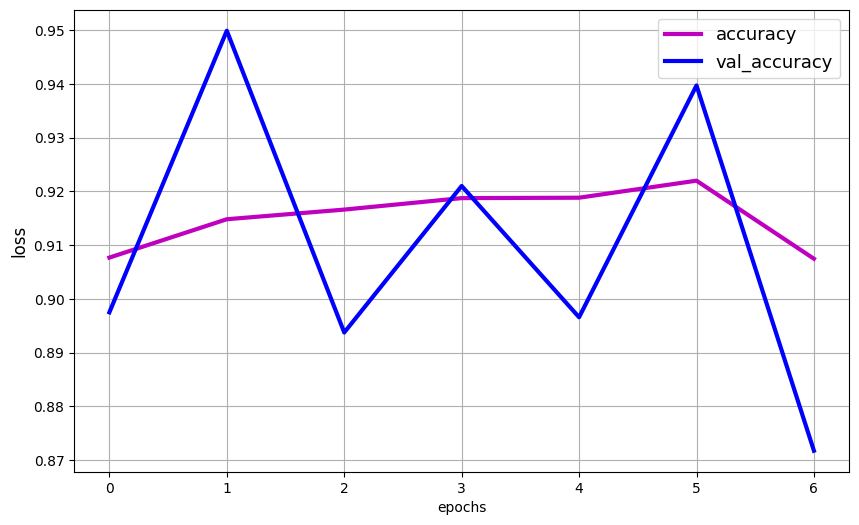

In [17]:
plt.figure(figsize=(10,6))
plt.plot(history_model.history['accuracy'], 'm', linewidth=3)
plt.plot(history_model.history['val_accuracy'], 'b', linewidth=3)
plt.legend(['accuracy', 'val_accuracy'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/models/model_dense_3_3_spike.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/models/model_dense_3_3_spike.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
pred = model.predict(X_test)

112463/112463 [==============================] - 186s 2ms/step


In [25]:
rounded_predictions = np.round(pred)
correct_predictions = (rounded_predictions == y_test)
accuracy = np.mean(correct_predictions) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 90.59%


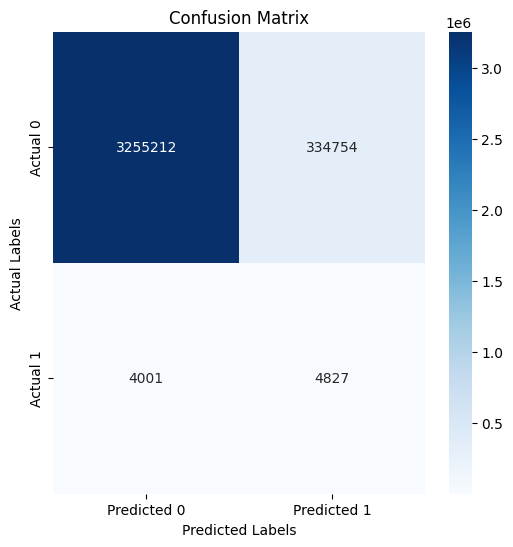

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, rounded_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()